# Pandas

pandas extends the numpy ndarray to allow for a data-structure that labels the columns (called a data frame)

In this manner, its main competition is R--the data frame provides the functionality for data analysis that R natively presents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## series

A series is a labeled array.  It looks superficially like a dictionary, but is fixed size, and can handle missing values.  It also can also be operated on with any numpy operation or the standard operators (a dictionary cannot)

Some examples from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1.191157
b   -0.675059
c   -0.652592
d   -1.142953
e    0.602475
dtype: float64

In [3]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [4]:
pd.Series(np.random.randn(5))

0    0.801594
1   -0.366619
2    0.630456
3   -0.049376
4   -0.134067
dtype: float64

you can initialize from a dictionary

In [5]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0
b    1
c    2
dtype: float64

In [6]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b     1
c     2
d   NaN
a     0
dtype: float64

Note that NaN indicates a missing value

you can operate on a series as you would any ndarray

In [7]:
s[0]

1.1911573751714062

In [8]:
s[:3]

a    1.191157
b   -0.675059
c   -0.652592
dtype: float64

In [9]:
s

a    1.191157
b   -0.675059
c   -0.652592
d   -1.142953
e    0.602475
dtype: float64

In [10]:
s[s > s.median()]

a    1.191157
e    0.602475
dtype: float64

In [11]:
np.exp(s)

a    3.290888
b    0.509126
c    0.520695
d    0.318876
e    1.826635
dtype: float64

you can also index by label

In [12]:
s['a']

1.1911573751714062

In [13]:
s['e']

0.60247526922402705

In [14]:
'e' in s

True

In [15]:
s.get('f', np.nan)

nan

In [16]:
s + s

a    2.382315
b   -1.350118
c   -1.305183
d   -2.285906
e    1.204951
dtype: float64

In [17]:
s * 2

a    2.382315
b   -1.350118
c   -1.305183
d   -2.285906
e    1.204951
dtype: float64

note that operations are always done on like labels, so the following is not exactly the same as numpy arrays.  In this sense, pandas results respect the union of indices 

In [18]:
s[1:] + s[:-1]

a         NaN
b   -1.350118
c   -1.305183
d   -2.285906
e         NaN
dtype: float64

a series can have a name

In [19]:
s = pd.Series(np.random.randn(5), name='something')
s

0    0.491615
1   -1.895708
2   -0.253100
3   -0.080580
4   -1.150157
Name: something, dtype: float64

## DataFrame

The dataframe is like a spreadsheet -- the columns and rows have labels.  It is 2-d

you can initialize from Series

In [90]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [91]:
df = pd.DataFrame(d)
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In IPython, tab completion for column names is enabled

In [93]:
df.one

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

In [22]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4
b,2,2
a,1,1


or from lists / ndarrays

In [23]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

In [24]:
pd.DataFrame(d)

,one,two
0,1,4
1,2,3
2,3,2
3,4,1


In [25]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1,4
b,2,3
c,3,2
d,4,1


there are lots of other initialization methods, e.g, list of dicts

In [26]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20


Working with the dataframe

you can index it as it it were Series objects

In [27]:
df['one']

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

In [28]:
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [29]:
type(df['one'])

pandas.core.series.Series

In [31]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1,1,1,False
b,2,2,4,False
c,3,3,9,True
d,NaN,4,NaN,False


you can delete or pop columns

In [32]:
del df['two']

In [33]:
three = df.pop('three')

In [34]:
df

,one,flag
a,1,False
b,2,False
c,3,True
d,NaN,False


In [35]:
three

a     1
b     4
c     9
d   NaN
Name: three, dtype: float64

initialize with a scalar

In [36]:
df['foo'] = 'bar'

In [37]:
df

,one,flag,foo
a,1,False,bar
b,2,False,bar
c,3,True,bar
d,NaN,False,bar


## CSV

you can also read from CSV

Note, if there is stray whitespace in your strings in the CSV, pandas will keep it.  This is a bit annoying, and you might need to investigate converters to get things properly formatted.

There are similar methods for HDF5 and excel

In [173]:
grades = pd.read_csv('sample.csv', index_col="student", skipinitialspace=True)

In [106]:
grades

,hw 1,hw 2,hw 3,hw 4,exam
student,,,,,
A,10,9,10,7,97
B,8,7,9,9,82
C,NaN,9,6,5,75
D,8,9,9,9,90
E,NaN,10,10,10,95
F,8,2,6,7,66
G,6,NaN,4,5,60
H,8,8,9,8,84
I,10,7,10,10,92


In [107]:
grades.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q'],
      dtype='object', name='student')

In [108]:
grades.columns

Index(['hw 1', 'hw 2', 'hw 3', 'hw 4', 'exam'], dtype='object')

In [110]:
grades.ix["A"]

hw 1    10
hw 2     9
hw 3    10
hw 4     7
exam    97
Name: A, dtype: float64

In [111]:
grades['hw 1']

student
A    10
B     8
C   NaN
D     8
E   NaN
F     8
G     6
H     8
I    10
J    10
K     8
L     3
M     9
N     8
O    10
P     8
Q     5
Name: hw 1, dtype: float64

In [112]:
grades['hw average'] = (grades['hw 1'] + grades['hw 2'] + grades['hw 3'] + grades['hw 4'])/4.0

In [113]:
grades

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
B,8,7,9,9,82,8.25
C,NaN,9,6,5,75,NaN
D,8,9,9,9,90,8.75
E,NaN,10,10,10,95,NaN
F,8,2,6,7,66,5.75
G,6,NaN,4,5,60,NaN
H,8,8,9,8,84,8.25
I,10,7,10,10,92,9.25


this didn't handle the missing data properly

In [144]:
g2 = grades.fillna(0)

In [145]:
g2['hw average'] = (g2['hw 1'] + g2['hw 2'] + g2['hw 3'] + g2['hw 4'])/4.0

In [146]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
B,8,7,9,9,82,8.25
C,0,9,6,5,75,5.00
D,8,9,9,9,90,8.75
E,0,10,10,10,95,7.50
F,8,2,6,7,66,5.75
G,6,0,4,5,60,3.75
H,8,8,9,8,84,8.25
I,10,7,10,10,92,9.25


For big dataframes, we can view just pieces

In [147]:
g2.head()

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
B,8,7,9,9,82,8.25
C,0,9,6,5,75,5.00
D,8,9,9,9,90,8.75
E,0,10,10,10,95,7.50


In [148]:
g2.tail(2)

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
P,8,9,8,10,94,8.75
Q,5,7,6,5,78,5.75


### statistics

we get lots of statistics

In [164]:
g2.describe()

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,7.000000,7.470588,7.882353,8.000000,85.000000,7.588235,0.567129
std,3.221025,2.741296,1.964763,1.732051,11.407235,1.747635,0.249766
min,0.000000,0.000000,4.000000,5.000000,60.000000,3.750000,0.142044
25%,6.000000,7.000000,6.000000,7.000000,78.000000,5.750000,0.454260
50%,8.000000,8.000000,9.000000,9.000000,90.000000,8.250000,0.620648
75%,9.000000,9.000000,9.000000,9.000000,94.000000,8.750000,0.744803
max,10.000000,10.000000,10.000000,10.000000,99.000000,9.750000,0.975807


want to sort by values?

In [165]:
g2.sort_values(by="exam")

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
G,6,0,4,5,60,3.75,0.199343
F,8,2,6,7,66,5.75,0.282191
L,3,8,5,7,71,5.75,0.744803
C,0,9,6,5,75,5.00,0.704215
Q,5,7,6,5,78,5.75,0.142044
B,8,7,9,9,82,8.25,0.620648
H,8,8,9,8,84,8.25,0.778766
K,8,7,6,8,87,7.25,0.459572
D,8,9,9,9,90,8.75,0.692828


In [167]:
g2.mean()

hw 1           7.000000
hw 2           7.470588
hw 3           7.882353
hw 4           8.000000
exam          85.000000
hw average     7.588235
new            0.567129
dtype: float64

In [171]:
g2.median()

hw 1           8.000000
hw 2           8.000000
hw 3           9.000000
hw 4           9.000000
exam          90.000000
hw average     8.250000
new            0.620648
dtype: float64

In [172]:
g2.max()

hw 1          10.000000
hw 2          10.000000
hw 3          10.000000
hw 4          10.000000
exam          99.000000
hw average     9.750000
new            0.975807
dtype: float64

In [169]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10,9,10,7,97,9.00,0.785774
B,8,7,9,9,82,8.25,0.620648
C,0,9,6,5,75,5.00,0.704215
D,8,9,9,9,90,8.75,0.692828
E,0,10,10,10,95,7.50,0.181110
F,8,2,6,7,66,5.75,0.282191
G,6,0,4,5,60,3.75,0.199343
H,8,8,9,8,84,8.25,0.778766
I,10,7,10,10,92,9.25,0.975807


In [170]:
g2.apply(lambda x: x.max() - x.min())

hw 1          10.000000
hw 2          10.000000
hw 3           6.000000
hw 4           5.000000
exam          39.000000
hw average     6.000000
new            0.833762
dtype: float64

### access

Pandas provides optimizes methods for accessing data: .at, .iat, .loc, .iloc, and .ix

The standard slice notation works for rows, but note *when using labels, both endpoints are included*

In [151]:
g2["E":"I"]

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
E,0,10,10,10,95,7.50
F,8,2,6,7,66,5.75
G,6,0,4,5,60,3.75
H,8,8,9,8,84,8.25
I,10,7,10,10,92,9.25


In [152]:
g2.loc[:,["hw 1", "exam"]]

,hw 1,exam
student,,
A,10,97
B,8,82
C,0,75
D,8,90
E,0,95
F,8,66
G,6,60
H,8,84
I,10,92


`at` is a faster access method

In [153]:
g2.at["A","exam"]

97

The `i` routines work in index space, similar to how numpy does

In [154]:
g2.iloc[3:5,0:2]

,hw 1,hw 2
student,,
D,8,9
E,0,10


In [155]:
g2.iloc[[1,3,5], [1,2,3,4]]

,hw 2,hw 3,hw 4,exam
student,,,,
B,7,9,9,82
D,9,9,9,90
F,2,6,7,66


In [156]:
g2.iat[2,2]

6

### boolean indexing

In [157]:
g2[g2.exam > 90]

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
E,0,10,10,10,95,7.50
I,10,7,10,10,92,9.25
J,10,6,9,9,91,8.50
M,9,9,8,9,94,8.75
O,10,10,10,9,99,9.75
P,8,9,8,10,94,8.75


### np arrays

In [158]:
g2.loc[:, "new"] = np.random.random(len(g2))

In [159]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10,9,10,7,97,9.00,0.785774
B,8,7,9,9,82,8.25,0.620648
C,0,9,6,5,75,5.00,0.704215
D,8,9,9,9,90,8.75,0.692828
E,0,10,10,10,95,7.50,0.181110
F,8,2,6,7,66,5.75,0.282191
G,6,0,4,5,60,3.75,0.199343
H,8,8,9,8,84,8.25,0.778766
I,10,7,10,10,92,9.25,0.975807


resetting values

In [180]:
a = g2[g2.exam < 80].index

In [182]:
g2.loc[a, "exam"] = 80

In [183]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10,9,10,7,97,9.00,0.785774
B,8,7,9,9,82,8.25,0.620648
C,0,9,6,5,80,5.00,0.704215
D,8,9,9,9,90,8.75,0.692828
E,0,10,10,10,95,7.50,0.181110
F,8,2,6,7,80,5.75,0.282191
G,6,0,4,5,80,3.75,0.199343
H,8,8,9,8,84,8.25,0.778766
I,10,7,10,10,92,9.25,0.975807


## histogramming

In [189]:
g2["exam"].value_counts()

80    5
94    2
90    2
95    1
92    1
91    1
87    1
84    1
82    1
99    1
97    1
Name: exam, dtype: int64

## plotting

In [185]:
%matplotlib inline

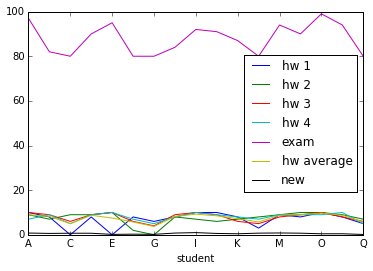

In [191]:
g2.plot()

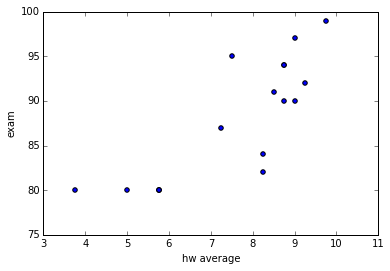

In [198]:
g2.plot.scatter(x="hw average", y="exam", marker="o")

A lot more examples at: http://pandas.pydata.org/pandas-docs/stable/visualization.html